# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 2</center></h1>
## <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Hai Nguyen</center></h1>
#### <h1><center>Due day: 11:00 pm, Thursday, 20 September, 2022 </center></h1>
### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.
### If you have questions, please submit them to [our piazza channel](piazza.com/utexas/fall2022/em397).

## **Question 1** (Linear regression and regularization techniques)

In this problem, we approximate the polynomial from noisy data points. To that end, we generate a data pair $(x^{(i)}, y^{(i)})$ by  

$$ y^{(i)} = .5 - {x^{(i)}} - .5 {x^{(i)}}^2 - 2 {x^{(i)}}^3 + 5 {x^{(i)}}^4 + \delta \varphi^{(i)} x^{(i)},$$

where $\delta = 0.05$ is the noise level, $\varphi$ is drawn from standard normal distribution. We need to generate 8 holdout samples and 7 training samples.

- (1.a) Filling the generating data code and visualize them and functions.
- (1.b) Performing the LinearRegression() using polynomial approximation of order of 1, 10 and 4. Visualizing each cases to see which case are overfitting, underfitting and good fit. Adding the mean square error of the holdout data for convincing.
- (1.c) For overfitting senario, applying L2 regularization. You need to do: 
    + step 1: Plot the L2 regularization model versus no regularization model and true function in one plot to see how L2 works (pick a reasonable $\lambda$).
    + step 2: Plot the relationship between mean square error of holdout data and regularization parameter $\lambda$. What is the optimal $\lambda$? 
    + step 3: Using L-curved technique to find out the optimal $\lambda$. The L-curved line is the one represents the relationship between residual norm $||y - f(x,\theta)||_2$ and solution norm $||||_2$. Where does the optimal parameter obtained in step 2 lie in the L-curved line?
- (1.d) For overfitting senario, applying L1 regularization. Repeat the all 3 steps in the question (1.c).
- (1.e) You will find it interesting if you search the L-curved techniques to determined the regularization parameter for inverse problems. Does your point in step 3 above match with the theory of original L-curved theory? (L-curved method [https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf])
- (1.f) For overfitting senario, applying Elasticnet regularization (a mixture of L1 and L2), i.e., the loss function with Elasticnet regularization is 
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1 + \frac{1}{2} \gamma ||\theta||_2^2$$

You need to plot the contour with x-axis is $\lambda$, y-axis is $\gamma$ and value of function is the mean square error of holdout data. Can you make commments between Elasticnet and L2, L1 regularization?

- (1.g) The question is *can we do something else?* and then get the same regularization effect? The answer is **data augmentation technique**. The data augmentation techniques are
    + step 1: Clone 7 (X) samples data to 350 samples (using numpy.repeat). (Note: this is clean data - noise free).
    + step 2: We add noise the 350 $x^i$ sample by $$\tilde{x}^i = x^i + \delta \varphi^i$$, where $\varphi^i$ is drawn from standard normal distribution. We get X_data_augmented.
    + step 3: clone 7 (f(X)) samples data to 350 samples (using numpy.repeat), denoted y_data_augmented. 
    + step 4: Using Linearregression to get model from data augmented data pairs (X_data_augmented, y_data_augmented).

    You need to (1) generate augmented data, (2) What is a good noise level $\delta$? Can you explain why too much/small noise is not good? (Train Neural Networks With Noise to Reduce Overfitting, [https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/])


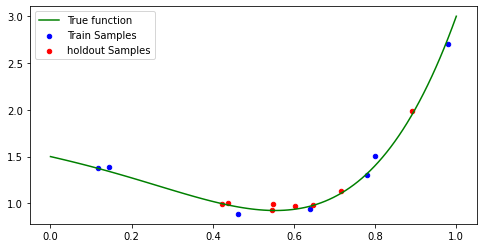

In [371]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression


order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

# Test samples
n_holdout_samples = 8
X_holdout = np.sort(np.random.rand(n_holdout_samples)) 
Y_holdout = true_fn(X_holdout) + np.random.randn(n_holdout_samples) * 0.05 * true_fn(X_holdout)

# Training samples
n_samples = 7

X = np.sort(np.random.rand(n_samples)) 
Y = true_fn(X) + np.random.randn(n_samples) * 0.05 * true_fn(X)

X_test = np.linspace(0., 1., 100)

plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X,Y, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.scatter(X_holdout,Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="holdout Samples")
plt.legend()

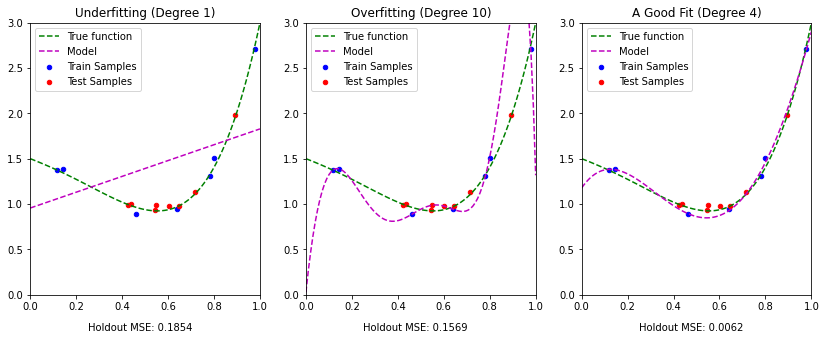

In [420]:
def MSE(y_true, y_predict):
    return ((y_true-y_predict)**2).mean()


degrees = [1, 10, 4]
titles = ['Underfitting', 'Overfitting', 'A Good Fit']
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], Y)

    ax.plot(X_test, true_fn(X_test), 'g--', label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), 'm--', label="Model")
    ax.scatter(X, Y, edgecolor='b', facecolor = 'b', s=20, label="Train Samples")
    ax.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="Test Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 3))
    ax.legend(loc="best")
    ax.set_title("{} (Degree {})".format(titles[i], degrees[i]))
    ax.text(0.25,-.4, 'Holdout MSE: %.4f' % (MSE(Y_holdout,pipeline.predict(X_holdout[:, np.newaxis]))))

Text(0.5, 1.0, 'Regularization techniques')

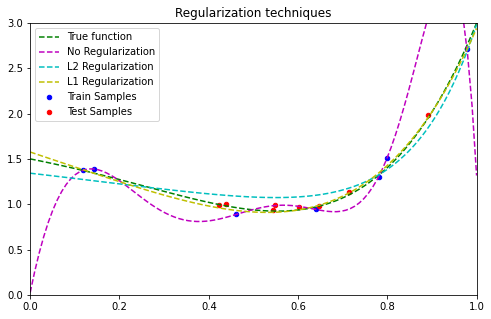

In [356]:
# fit a Ridge model
plt.figure(figsize=(8, 5))
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X[:, np.newaxis], Y)
    
# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
L2_Regularizer = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda
pipeline2 = Pipeline([("pf", polynomial_features), ("lr", L2_Regularizer)])
pipeline2.fit(X[:, np.newaxis], Y)    

# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
Lasso_regulaizer = Lasso(alpha=0.001) # sklearn uses alpha instead of lambda
pipeline3 = Pipeline([("pf", polynomial_features), ("lr", Lasso_regulaizer)])
pipeline3.fit(X[:, np.newaxis], Y)    

# visualize results
plt.plot(X_test, true_fn(X_test), 'g--',label="True function")    
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), 'm--', label="No Regularization")
plt.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), 'c--' , label="L2 Regularization") 
plt.plot(X_test, pipeline3.predict(X_test[:, np.newaxis]), 'y--',label="L1 Regularization")    
plt.scatter(X, Y, edgecolor='b', facecolor = 'b', s=20, label="Train Samples")
plt.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="Test Samples")
plt.xlim((0, 1))
plt.ylim((0, 3))
plt.legend(loc="best")
plt.title('Regularization techniques')

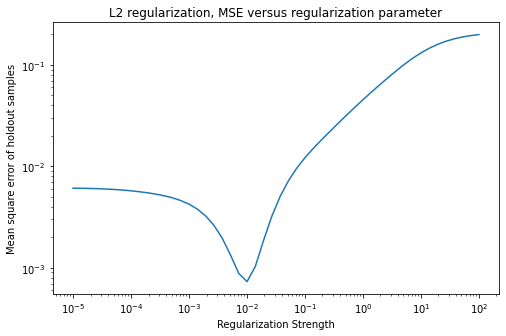

In [357]:
lamda = np.logspace(-5, 2, 50)
Error = np.zeros(lamda.shape)
Solution_norm = np.zeros(lamda.shape)
Residual_norm = np.zeros(lamda.shape)
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

for i in range(len(lamda)):
    L2_Regularizer = Ridge(alpha=lamda[i]) # sklearn uses alpha instead of lambda
    pipeline2 = Pipeline([("pf", polynomial_features), ("lr", L2_Regularizer)])
    pipeline2.fit(X[:, np.newaxis], Y)
    Error[i] = MSE(Y_holdout,pipeline2.predict(X_holdout[:, np.newaxis]))
    Solution_norm[i] = np.linalg.norm(L2_Regularizer.coef_)
    Residual_norm[i] = np.linalg.norm(Y_holdout - pipeline2.predict(X_holdout[:, np.newaxis]))

plt.figure(figsize=(8, 5))
plt.plot(lamda, Error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('Mean square error of holdout samples')
plt.title('L2 regularization, MSE versus regularization parameter')
plt.show()


Text(0.5, 1.0, 'L-curved method for L2 regularization, The optimal point is 1.0e-02')

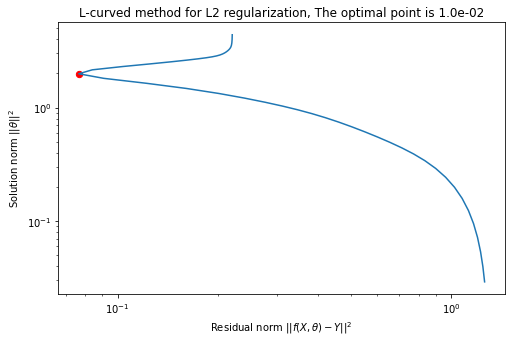

In [358]:
plt.figure(figsize=(8, 5))
point = 21
plt.plot(Residual_norm, Solution_norm)
plt.scatter(Residual_norm[point], Solution_norm[point], edgecolor='r', facecolor = 'r', s=40, label="L-curve point")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual norm ' + r'$||f(X,\theta) - Y||^2$')
plt.ylabel('Solution norm ' + r'$||\theta||^2$')
plt.title('L-curved method for L2 regularization, The optimal point is %.1e' %(lamda[point]))

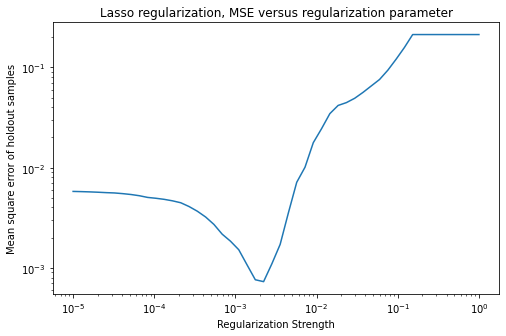

In [359]:


lamda = np.logspace(-5, 0, 50)
Error = np.zeros(lamda.shape)
Solution_norm = np.zeros(lamda.shape)
Residual_norm = np.zeros(lamda.shape)
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

for i in range(len(lamda)):
    Lasso_regulaizer = Lasso(alpha=lamda[i]) # sklearn uses alpha instead of lambda
    pipeline3 = Pipeline([("pf", polynomial_features), ("lr", Lasso_regulaizer)])
    pipeline3.fit(X[:, np.newaxis], Y)
    Error[i] = MSE(Y_holdout,pipeline3.predict(X_holdout[:, np.newaxis]))
    Solution_norm[i] = np.linalg.norm(Lasso_regulaizer.coef_)
    Residual_norm[i] = np.linalg.norm(Y_holdout - pipeline3.predict(X_holdout[:, np.newaxis]))

plt.figure(figsize=(8, 5))
plt.plot(lamda, Error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('Mean square error of holdout samples')
plt.title('Lasso regularization, MSE versus regularization parameter')
plt.show()



Text(0.5, 1.0, 'L-curved method for Lasso regularization, The optimal point is 2.2e-03')

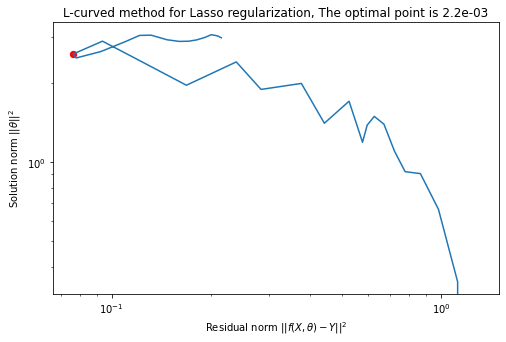

In [360]:
plt.figure(figsize=(8, 5))
point = 23
plt.plot(Residual_norm, Solution_norm)
plt.scatter(Residual_norm[point], Solution_norm[point], edgecolor='r', facecolor = 'r', s=40, label="L-curve point")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual norm ' + r'$||f(X,\theta) - Y||^2$')
plt.ylabel('Solution norm ' + r'$||\theta||^2$')
plt.title('L-curved method for Lasso regularization, The optimal point is %.1e' %(lamda[point]))


In [361]:
lamda = np.logspace(-5, 0, 50) # for L2 regularization
beta = np.logspace(-5, 0, 50) # for L1 regularization
Error = np.zeros((50,50))
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

for i in range(len(lamda)):
    for j in range(len(beta)):    
        ElasticNet_regulaizer = ElasticNet(alpha=lamda[i] + beta[j], l1_ratio = beta[j] / (lamda[i] + beta[j]))
        pipeline3 = Pipeline([("pf", polynomial_features), ("lr", ElasticNet_regulaizer)])
        pipeline3.fit(X[:, np.newaxis], Y)
        Error[i, j] = np.log(MSE(Y_holdout,pipeline3.predict(X_holdout[:, np.newaxis])))
    



Text(0.5, 1.0, 'Contour map of log(MSE) and Elasticnet regularizer')

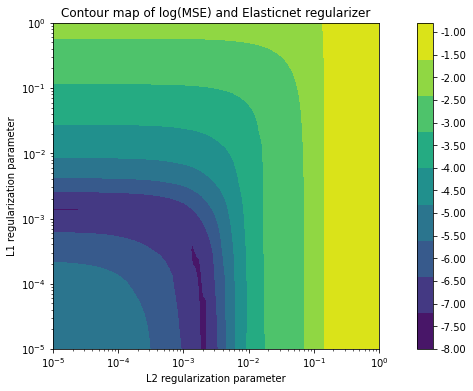

In [362]:
plt.figure(figsize=(8,6))
lvls = np.linspace(-8,0,17)
contoursf = plt.contourf(lamda, beta, Error, level = lvls)
plt.colorbar(contoursf,ticks=lvls, format='%.2f')

plt.xlim((1e-5,1)), plt.xlabel('L2 regularization parameter')
plt.ylim((1e-5,1)), plt.ylabel('L1 regularization parameter')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.title('Contour map of log(MSE) and Elasticnet regularizer')

Text(0.5, 1.0, 'Data augmentation techniques and Regularization techniques')

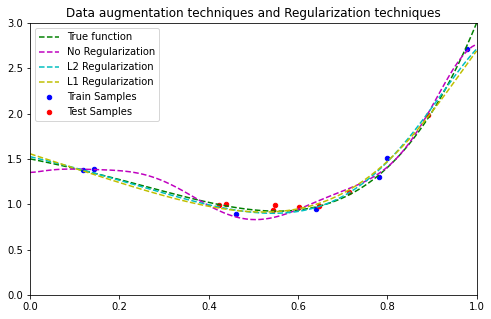

In [418]:
noise_level = 0.05
clone_times = 50   

X_data_augmented = np.repeat(X, clone_times, axis = 0) + noise_level * np.random.randn(clone_times * X_base.shape[0], )
Y_data_augmented = np.repeat(Y, clone_times, axis = 0)

# fit a Ridge model
plt.figure(figsize=(8, 5))
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X_data_augmented[:, np.newaxis], Y_data_augmented)
    
# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
L2_Regularizer = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda
pipeline2 = Pipeline([("pf", polynomial_features), ("lr", L2_Regularizer)])
pipeline2.fit(X_data_augmented[:, np.newaxis], Y_data_augmented)    

# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
Lasso_regulaizer = Lasso(alpha=0.001) # sklearn uses alpha instead of lambda
pipeline3 = Pipeline([("pf", polynomial_features), ("lr", Lasso_regulaizer)])
pipeline3.fit(X_data_augmented[:, np.newaxis], Y_data_augmented)    

# visualize results
plt.plot(X_test, true_fn(X_test), 'g--',label="True function")    
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), 'm--', label="No Regularization")
plt.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), 'c--' , label="L2 Regularization") 
plt.plot(X_test, pipeline3.predict(X_test[:, np.newaxis]), 'y--',label="L1 Regularization")    
plt.scatter(X, Y, edgecolor='b', facecolor = 'b', s=20, label="Train Samples")
plt.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="Test Samples")
plt.xlim((0, 1))
plt.ylim((0, 3))
plt.legend(loc="best")
plt.title('Data augmentation techniques and Regularization techniques')

## **Question 2** (Logistic regression)

In this problem, we will learn the model that classifies three types of iris flowers ('Iris Setosa', 'Iris Versicolour', 'Iris Virginica') based on 4 features (petal length, petal width, sepal length, sepal width).
- (2.a) Visualize 'Iris Setosa', 'Iris Versicolour', 'Iris Virginica' flowers with respect to petal length (x-axis) and petal width (y-axis), see lecture 1.
- (2.b) Performing Logistic regression without regularization to learn the model. You need to test the model on the same data and then visualizing the flower data points that are misclassified (circling the point with figure in 2.a, see lecture 1 for diabetes risk example).
- (2.c) Performing Logistic regression with L2 regularization. You need to test the model on the same data and then visualizing the flower data points that are misclassified.
- (2.d) Performing Logistic regression with L1 regularization (using *liblinear* solver, look at scikit-learn). You need to test the model on the same data and then visualizing the flower data points that are misclassified.
- (2.e) Comparing the number of wrongly predicted points from (2c) and (2.d) with the one from (2.b). What is the reason for that result?

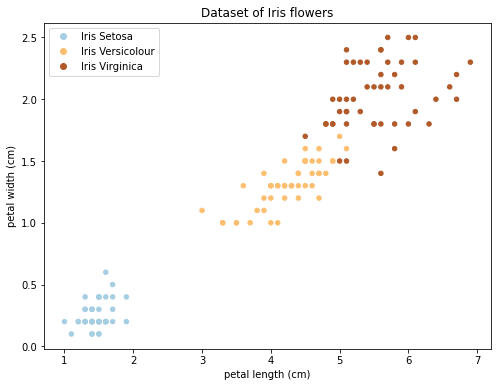

In [363]:
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Visualize data
plt.figure(figsize=(8,6))
p1 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=1, c=iris.target, cmap='Paired', s=20)
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

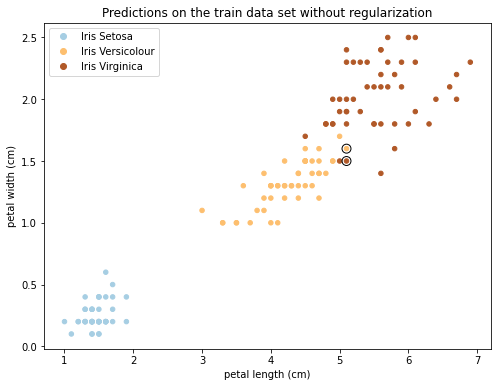

In [364]:
pipeline_no_reg = Pipeline([("pf", LogisticRegression(random_state=0, penalty = 'none'))])
pipeline_no_reg.fit(X,y)
y_pred = pipeline_no_reg.predict(X)
index_error = (y_pred - y) != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=1, c=iris.target, cmap='Paired', s=20)
plt.scatter(iris.data[index_error, 2], iris.data[index_error, 3], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Predictions on the train data set without regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])


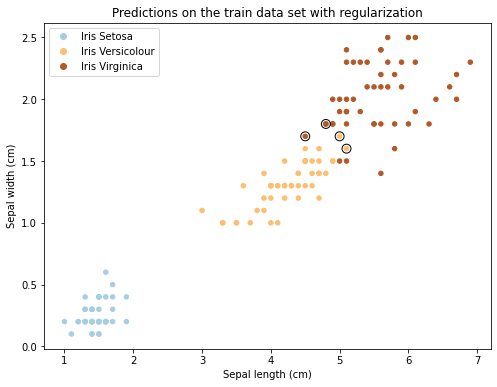

In [365]:
pipeline_L2_reg = Pipeline([("pf", LogisticRegression(random_state=0, penalty = 'l2'))])
pipeline_L2_reg.fit(X,y)
y_pred = pipeline_L2_reg.predict(X)
index_error = (y_pred - y) != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=1, c=iris.target, cmap='Paired', s=20)
plt.scatter(iris.data[index_error, 2], iris.data[index_error, 3], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Predictions on the train data set with regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])


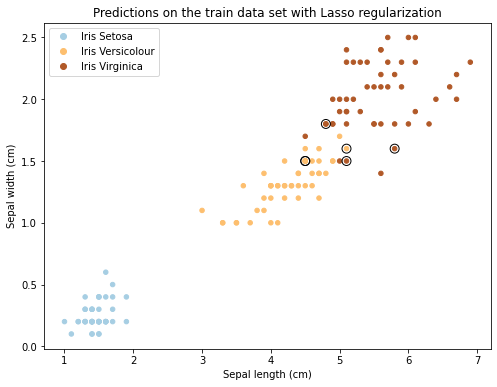

In [366]:
pipeline_L1_reg = Pipeline([("pf", LogisticRegression(random_state=0, penalty = 'l1', solver = 'liblinear'))])
pipeline_L1_reg.fit(X,y)
y_pred = pipeline_L1_reg.predict(X)
index_error = (y_pred - y) != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(iris.data[:,2], iris.data[:,3], alpha=1, c=iris.target, cmap='Paired', s=20)
plt.scatter(iris.data[index_error, 2], iris.data[index_error, 3], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Predictions on the train data set with Lasso regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])


## **Question 3** (Probability)

Prove that if $$A \subseteq B$$ then $$\mathcal{P} [A] \le \mathcal{P} [B].$$